# 3.6 综合示例——小费数据集

## 3.6.1 数据分析流程

### 数据分析的流程通常情况下分为5步。


#### （1）收集数据。在这一步中，需要对收集的数据有一定的认知，对各字段的含义和背景知识都要有着足够的理解。
#### （2）定义问题。根据各自的行业和业务知识，对数据定义多个待解决的问题。
#### （3）数据清洗与整理。由于各种问题，获取的数据不够“干净”，需通过各种手段对数据进行清洗与整理，以便得到准确的分析结果。
#### （4）数据探索。通过可视化等手段，对数据进行分析和探索，得出结论。
#### （5）数据展示。这部分用于输出，或撰写数据分析报告、或汇报给上级、或绘制PPT。

### 以上只是基本的数据分析流程，根据实际情况会略有不同。例如，在实际工作中，第（1）步和第（2）步可能会顺序颠倒，首先需要明确目标，然后再根据目标收集数据；在数据探索方面，也会使用数据挖掘等技术实现更具复杂和有实际操作意义的模型。

## 3.6.2 数据来源

### 小费数据集来源于Python第三方库seaborn（用于绘图）中自带的数据，加载该数据集

In [3]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import seaborn as sns  #导入seaborn库

In [4]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 注意：head函数会返回前5条数据，也可指定返回数据行数。

### 众所周知，在西方国家的服务行业中，顾客会给予服务员一定金额的小费。该小费数据为餐饮行业收集的数据。total_bill列为消费总金额；tip列为小费金额；sex列为顾客性别；smoker列为顾客是否抽烟；day列为消费的星期；time列为聚餐的时间段；size列为聚餐人数。

## 3.6.3 定义问题

### 本次分析中，围绕小费数据集提出几个问题：小费金额与消费总金额是否存在相关性？性别、是否吸烟、星期几、中/晚餐、聚餐人数和小费金额是否有一定的关联？小费金额占消费总金额的百分比服从正态分布？

## 3.6.4 数据清洗

### 首先对数据进行简单描述，看是否有缺失值或者异常值

In [5]:
tips.shape

(244, 7)

In [6]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### 通过结果可以看出，总共有244条数据，通过统计暂时看不出是否有缺失值。通过打印数据的info信息可以看出每列数据的类型和缺失值，本例中的小费数据集没有缺失值

In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


## 3.6.5 数据探索

### 首先对小费金额与消费总金额进行分析，看看它们之间是否有关联，通过下面代码绘制散点图

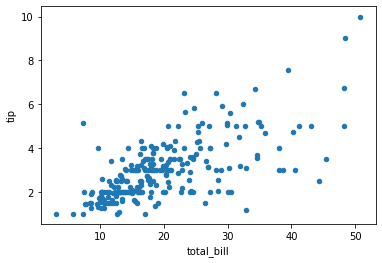

In [8]:
tips.plot(kind='scatter',x='total_bill',y='tip')

### 小费金额与消费总金额存在着正相关的关系，即消费的金额越多，给的小费也就越多，这是比较合理的。

### 我们再来看看性别不一样是否会影响小费的金额。这里使用柱状图，通过布尔选择男女性别，对小费数据进行平均后绘制柱状图

In [13]:
male_tip = tips[tips['sex']=='Male']['tip'].mean()
male_tip

3.0896178343949052

In [15]:
female_tip = tips[tips['sex']=='Female']['tip'].mean()
female_tip

2.833448275862069

In [17]:
s = Series([male_tip,female_tip],index=['male','female'])
s

male      3.089618
female    2.833448
dtype: float64

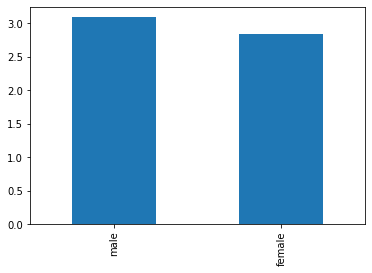

In [18]:
s.plot(kind='bar')

#### 注意：这种通过类别汇总的方法比较麻烦，下面讲解的groupby方法会简单许多。

### 其他字段与小费的关系也是类似的方法。例如，日期与小费的关系，由于观察数据时只看到了前5行数据，通过unique函数看下日期的唯一值有哪些，

In [19]:
tips['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [28]:
sun = tips[tips['day']=='Sun']['tip'].mean()
Sat = tips[tips['day']=='Sat']['tip'].mean()
thur = tips[tips['day']=='Thur']['tip'].mean()
fri = tips[tips['day']=='Fri']['tip'].mean()

In [29]:
s = Series([sun,Sat,thur,fri],index=['Sun','Sat','Thur','Fri'])
s

Sun     3.255132
Sat     2.993103
Thur    2.771452
Fri     2.734737
dtype: float64

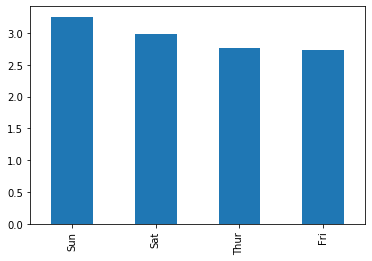

In [30]:
s.plot(kind='bar')

In [9]:
data = tips.groupby(by=['day'])['tip'].mean()
data

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

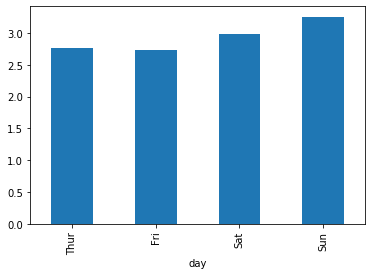

In [8]:
data.plot(kind='bar')

### 最后我们一起来分析一下小费百分比的分布情况，这里的消费总金额为小费的金额和聚餐所花费的金额（total_bill），通过DataFrame算术运算，新建一列，用于存储小费百分比

In [22]:
tips['percent_tip'] = tips['tip']/(tips['total_bill']+tips['tip'])
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size,percent_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.056111
1,10.34,1.66,Male,No,Sun,Dinner,3,0.138333
2,21.01,3.50,Male,No,Sun,Dinner,3,0.142799
3,23.68,3.31,Male,No,Sun,Dinner,2,0.122638
4,24.59,3.61,Female,No,Sun,Dinner,4,0.128014
5,25.29,4.71,Male,No,Sun,Dinner,4,0.157000
6,8.77,2.00,Male,No,Sun,Dinner,2,0.185701
7,26.88,3.12,Male,No,Sun,Dinner,4,0.104000
8,15.04,1.96,Male,No,Sun,Dinner,2,0.115294
9,14.78,3.23,Male,No,Sun,Dinner,2,0.179345
